In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense

from keras.utils import to_categorical

from keras.preprocessing import image

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [0]:
def plot_img(img):
  plt.imshow(img.reshape(28,28), cmap="gray")

Image is :  1


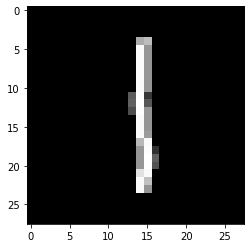

In [25]:
plot_img(x_train[1002])
print("Image is : " , y_train[1002])

# Model Building

In [30]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [32]:
x_train.shape

(60000, 784)

In [33]:
x_test.shape

(10000, 784)

In [0]:
model = Sequential()
model.add( Dense(units=32, activation='relu', input_shape = (784,))  ) # input_shape only for first layer
model.add( Dense(units=64, activation='relu' ))
model.add( Dense(units=128, activation = 'relu'))
model.add( Dense(units=32, activation = 'relu'))
model.add( Dense(units=10, activation='softmax')) # final  softmax = > probabilities

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
# "adam"/"sgd"/"rmsprop"
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [38]:
y_train.shape

(60000,)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
y_train.shape

(60000, 10)

In [42]:
y_test.shape

(10000, 10)

In [43]:
hist = model.fit(x=x_train, y= y_train, batch_size=32,epochs = 10, validation_data=(x_test, y_test) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.6172 - accuracy: 0.8299 - val_loss: 0.3001 - val_accuracy: 0.9175
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2454 - accuracy: 0.9300 - val_loss: 0.2149 - val_accuracy: 0.9381
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1899 - accuracy: 0.9456 - val_loss: 0.2000 - val_accuracy: 0.9437
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1624 - accuracy: 0.9536 - val_loss: 0.1737 - val_accuracy: 0.9545
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1443 - accuracy: 0.9589 - val_loss: 0.1554 - val_accuracy: 0.9592
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.1264 - accuracy: 0.9635 - val_loss: 0.1566 - val_accuracy: 0.9588
Epoch 7/10
60000/60000 [==============================] - 3s 55us/st

In [44]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 23us/step


[0.17551743202386424, 0.9621999859809875]

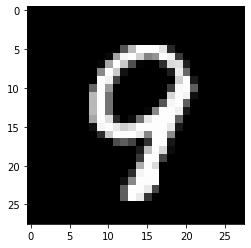

In [59]:
plot_img(x_test[5001])

In [0]:
y_pred = model.predict_classes(x_test)

In [61]:
y_pred[5001]

9

In [63]:
model.predict_classes(x_test[[5000]])

array([3])

In [65]:
# this code is custom image. 

img = image.load_img("untitled.png", grayscale=True, target_size=(28,28))
img = np.array(img)
img = img.reshape(1, 784)

prediction = model.predict_classes(img)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [66]:
prediction

array([1])